## Import Libraries, upload file, general review

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind, levene, pearsonr, ttest_1samp 

In [45]:
#Open File
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [47]:
#Display column names to verify structure
df_columns = df.columns
print(df_columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [48]:
#Show latest rows
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [49]:
#Basic statistics
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Prepare the data

In [50]:
df.columns = [col.lower() for col in df.columns]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [51]:
#Verification of null values
df_missing = df.isnull().sum()
print(df_missing[df_missing>0])

name                  2
year_of_release     269
genre                 2
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [52]:
#Duplicate verification
df.duplicated().sum()

0

In [53]:
#Solve TBD data
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [54]:
#I replace the tbd values with Nan, which I will deal with in the next step.
df['user_score'] = df['user_score'].replace('tbd', np.nan)  # Replace 'tbd' for NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')  # Convert a numeric

## Data type conversion

In [55]:
#fill in null values
#1) name column
df['name'].fillna('unknow', inplace=True)
#2) year_of_release column, I use the median because it makes more sense to take the median data than to 
#calculate an average of the years.
df['year_of_release'].fillna(df['year_of_release'].median(), inplace=True)
#3) genre column, since it is empty, to facilitate processing I set it as unknown
df['genre'].fillna('unknow', inplace=True)
#4) critic_score column, I use the arithmetic mean as a measure of central tendency which captures the dispersion of the data 
df['critic_score'].fillna(df['critic_score'].mean(), inplace=True)
#5) user_score column, I use the arithmetic mean as a measure of central tendency, which captures the dispersion of the data.
df['user_score'].fillna(df['user_score'].mean(), inplace=True)
#6) rating column, I will use the mode because it is the most frequently repeated data, which will reflect the score of most ratings
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [56]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [57]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000
mean,2006.492911,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.829925,0.813604,0.503339,0.308853,0.186731,9.724580,1.010753
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,68.967679,7.125046
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,68.967679,7.125046
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [58]:
#Total Sales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

## Data Analysis

In [59]:
#Games released by period
juegos_periodo = df['year_of_release'].value_counts().sort_index()
print(juegos_periodo)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


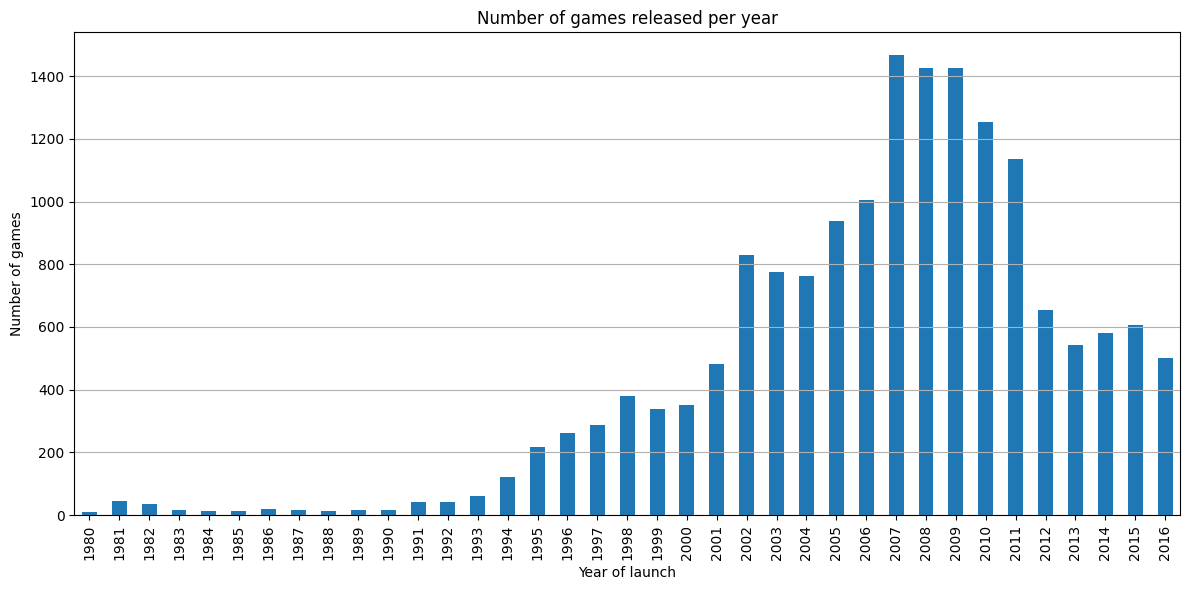

In [60]:
#Bar chart
juegos_periodo.plot(kind='bar', figsize=(12,6))
plt.title('Number of games released per year')
plt.xlabel('Year of launch')
plt.ylabel('Number of games')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [61]:
#Cumulative sales by platform
ventas_plataforma_total = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(ventas_plataforma_total)
print("Media:",ventas_plataforma_total.mean())
print(ventas_plataforma_total.head(10))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64
Media: 287.6035483870954
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


In [62]:
#Ventas por plataforma por periodo
ventas_plataforma = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
print(ventas_plataforma)
print(df['platform'].unique())

    platform  year_of_release  total_sales
0       2600             1980        11.38
1       2600             1981        35.68
2       2600             1982        28.88
3       2600             1983         5.84
4       2600             1984         0.27
..       ...              ...          ...
239       XB             2008         0.18
240     XOne             2013        18.96
241     XOne             2014        54.07
242     XOne             2015        60.14
243     XOne             2016        26.15

[244 rows x 3 columns]
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


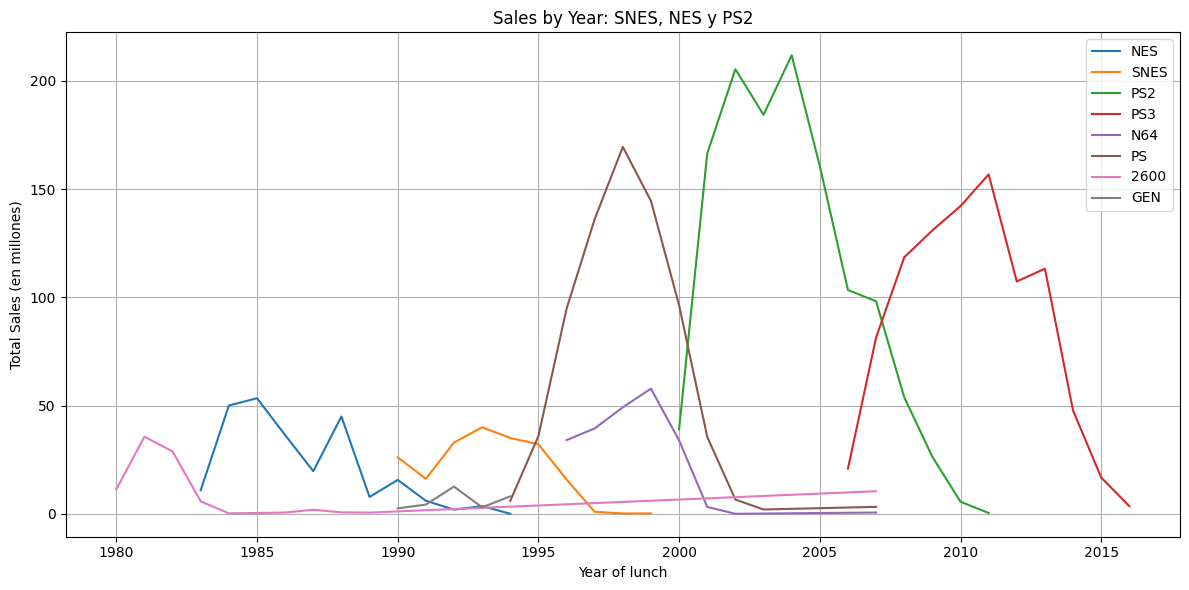

In [63]:
#Filter by platform, old platform (according to my limited knowledge of video games)

df_NES = df[df['platform'] == 'NES'].groupby('year_of_release')['total_sales'].sum().reset_index()
df_SNES = df[df['platform'] == 'SNES'].groupby('year_of_release')['total_sales'].sum().reset_index()
df_ps2 = df[df['platform'] == 'PS2'].groupby('year_of_release')['total_sales'].sum().reset_index()
df_PS3 = df[df['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum().reset_index()
df_N64 = df[df['platform'] == 'N64'].groupby('year_of_release')['total_sales'].sum().reset_index()
df_PS = df[df['platform'] == 'PS'].groupby('year_of_release')['total_sales'].sum().reset_index()
df_2600 = df[df['platform'] == '2600'].groupby('year_of_release')['total_sales'].sum().reset_index()
df_Gen = df[df['platform'] == 'GEN'].groupby('year_of_release')['total_sales'].sum().reset_index()

# Graphic
plt.figure(figsize=(12,6))

plt.plot(df_NES['year_of_release'], df_NES['total_sales'], label='NES')
plt.plot(df_SNES['year_of_release'], df_SNES['total_sales'], label='SNES')
plt.plot(df_ps2['year_of_release'], df_ps2['total_sales'], label='PS2')
plt.plot(df_PS3['year_of_release'], df_PS3['total_sales'], label='PS3')
plt.plot(df_N64['year_of_release'], df_N64['total_sales'], label='N64')
plt.plot(df_PS['year_of_release'], df_PS['total_sales'], label='PS')
plt.plot(df_2600['year_of_release'], df_2600['total_sales'], label='2600')
plt.plot(df_Gen['year_of_release'], df_Gen['total_sales'], label='GEN')

# Labels and Title
plt.title('Sales by Year: SNES, NES y PS2')
plt.xlabel('Year of lunch')
plt.ylabel('Total Sales (en millones)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

* New platforms appear every 5 years (approximately).
* There is no specific pattern to determine a central value for platforms that disappear. In the case of NES, it had sales from 1983 to 1994; in the case of SNES, it had sales from 1980 to 1998; and N64 had sales from 1997 to 2007.

* Taking into account the behavior of the data, I am using figures from 2006 onwards, because sales are more concentrated in the 2006-2016 segment and the variability and heterogeneity are more reflected in this interval. There is considerable, striking growth, but the series is declining again. 

In [64]:
#Data filter from 2000 onwards
df_datos_2006 = df[df['year_of_release']>=2006]

In [65]:
df_datos_2006.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [66]:
#Leading sales platform 2000–2016
ventas_plataforma_total_2006_2016 = df_datos_2006.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(ventas_plataforma_total_2006_2016.head(10))

platform
X360    963.17
PS3     939.65
Wii     907.51
DS      658.69
PS4     314.14
PS2     288.01
3DS     259.00
PSP     243.15
PC      167.18
XOne    159.32
Name: total_sales, dtype: float64


Total sales by platform for the period 2006-2016 are analyzed. It is found that among the top five platforms with the highest sales are X360, PS3, Wii, DS, and PS4. Compared to the overall total, the same platforms continue to appear as leaders, with the exception of PS, which saw a decline in sales after 2000, probably because it began to be replaced by more modern consoles. The period 2007-2011 accounts for a considerable part of the sales of the entire series. The data shows growth, but then returns to values similar to those prior to 2007.

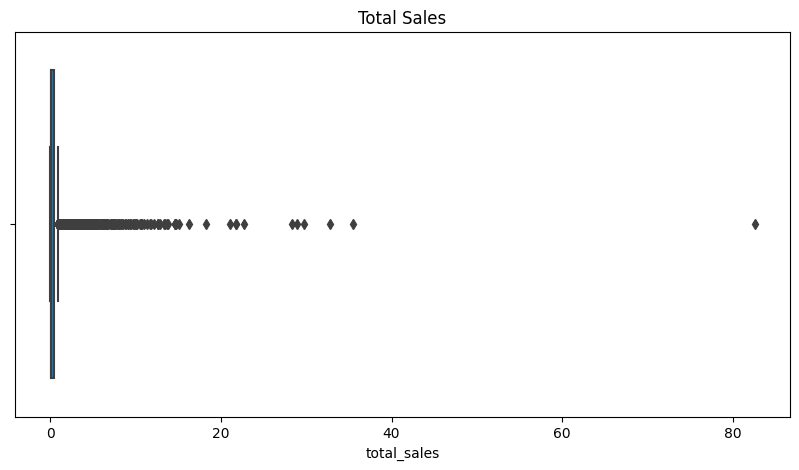

In [67]:
#Box diagram
plt.figure(figsize=(10,5))
sns.boxplot(x=df_datos_2006['total_sales'])
plt.title('Total Sales')
plt.show()

In [68]:
# Average sales per platform
promedio = df_datos_2006.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("Average sales per platform", promedio)

Average sales per platform platform
X360    963.17
PS3     939.65
Wii     907.51
DS      658.69
PS4     314.14
PS2     288.01
3DS     259.00
PSP     243.15
PC      167.18
XOne    159.32
WiiU     82.19
PSV      54.07
XB       16.94
GC       13.73
GBA      13.65
2600     10.50
PS        3.28
GB        1.03
N64       0.67
DC        0.06
Name: total_sales, dtype: float64


In [69]:
# Average sales per platform
promedio = df_datos_2006.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

# Median per platform
mediana = df_datos_2006.groupby('platform')['total_sales'].median().sort_values(ascending=False)

print("Average sales per platform", promedio)
print("Median per platform", mediana)

Average sales per platform platform
GB      1.030000
PS4     0.801378
X360    0.774252
PS3     0.705973
Wii     0.687508
XOne    0.645020
2600    0.617647
WiiU    0.559116
3DS     0.498077
PS      0.468571
PS2     0.343278
DS      0.327870
GBA     0.243750
GC      0.236724
N64     0.223333
PSP     0.221247
PC      0.210820
XB      0.194713
PSV     0.125744
DC      0.030000
Name: total_sales, dtype: float64
Median per platform platform
GB      1.030
2600    0.440
PS3     0.270
X360    0.270
WiiU    0.220
XOne    0.220
N64     0.200
PS4     0.200
Wii     0.190
PS      0.180
GC      0.140
PS2     0.130
3DS     0.120
DS      0.100
XB      0.090
PSP     0.080
GBA     0.075
PSV     0.055
PC      0.050
DC      0.030
Name: total_sales, dtype: float64


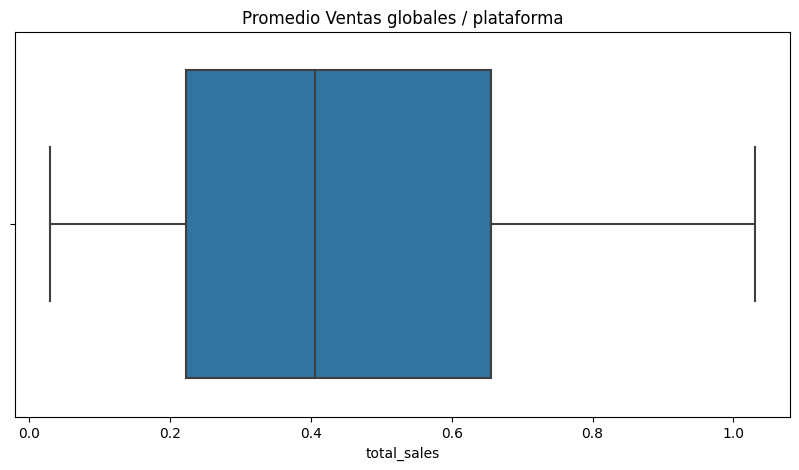

In [70]:
#Box plot / average
plt.figure(figsize=(10,5))
sns.boxplot(x=promedio)
plt.title('Promedio Ventas globales / plataforma')
plt.show()

On average, sales range between 0.03 and 1.3. There is a significant concentration of values between 0.3 and 0.7 (50% of values), with 25% of values above 0.7 and below 1.3. Calculated in this way, sales are led by GB, PS4, X360, PS3, and Wii

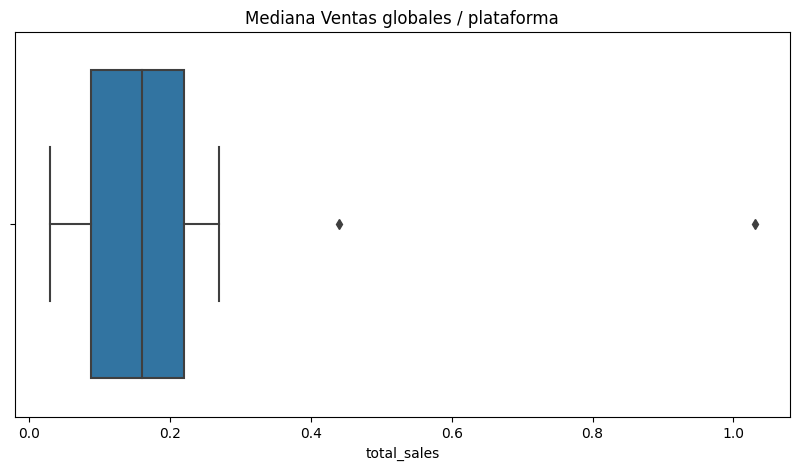

In [71]:
#Box plot / Median
plt.figure(figsize=(10,5))
sns.boxplot(x=mediana)
plt.title('Mediana Ventas globales / plataforma')
plt.show()

In [72]:
#Correlation between reviews and sales for GB
PS2_sales = df_datos_2006[df_datos_2006['platform']=='PS2']
PS2_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
148,Final Fantasy XII,PS2,2006,Role-Playing,1.88,0.00,2.33,1.74,92.0,7.6,T,5.95
183,Madden NFL 2004,PS2,2007,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
196,Guitar Hero II,PS2,2006,Misc,3.81,0.63,0.00,0.68,92.0,8.5,T,5.12
208,Guitar Hero III: Legends of Rock,PS2,2007,Misc,3.49,0.01,0.01,1.48,82.0,8.2,T,4.99
241,Madden NFL 07,PS2,2006,Sports,3.63,0.24,0.01,0.61,84.0,8.2,E,4.49


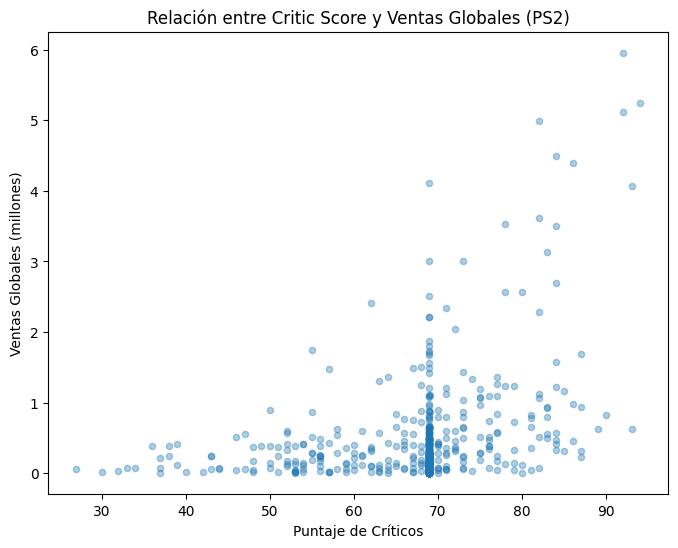

Correlation between critics' scores and sales: 0.3203924907507586


In [73]:
#Critics' scores
PS2_sales.plot(x='critic_score', y='total_sales', kind ='scatter', alpha =0.36, title ='Relación entre Critic Score y Ventas Globales (PS2)',figsize =[8,6],xlabel ='Puntaje de Críticos', ylabel ='Ventas Globales (millones)')  
plt.show()
Ps2_corr = PS2_sales['critic_score'].corr(PS2_sales['total_sales'])
print("Correlation between critics' scores and sales:", Ps2_corr)


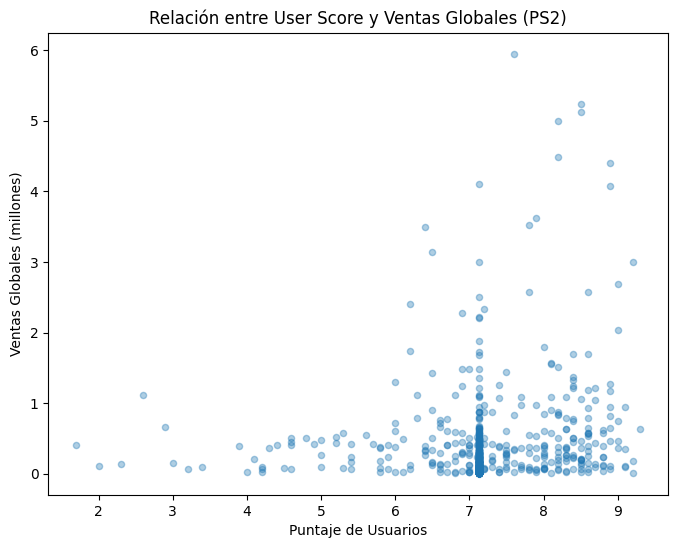

Correlation between user ratings and sales: 0.1751346495069262


In [74]:
#User Rating
PS2_sales.plot(x='user_score', y='total_sales', kind ='scatter', alpha =0.36, title ='Relación entre User Score y Ventas Globales (PS2)',figsize =[8,6],xlabel ='Puntaje de Usuarios', ylabel ='Ventas Globales (millones)')  
plt.show()
Ps2_corr_2 = PS2_sales['user_score'].corr(PS2_sales['total_sales'])
print("Correlation between user ratings and sales:", Ps2_corr_2)

In [75]:
#Games on various platforms
juegos_multiplataforma = df_datos_2006.groupby('name')['platform'].nunique()
juegos_multiplataforma = juegos_multiplataforma[juegos_multiplataforma > 1].index
df_juegos_multiplataforma = df_datos_2006[df_datos_2006['name'].isin(juegos_multiplataforma)]
df_juegos_multiplataforma.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.200000,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.000000,3.400000,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.967679,7.125046,E,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.000000,6.300000,M,14.62


In [76]:
#Single game filter: GTA V
juego = 'Grand Theft Auto V'
df_juego = df_juegos_multiplataforma[df_juegos_multiplataforma['name']== juego]
print(df_juego[['platform', 'total_sales']].sort_values(by='total_sales', ascending=False))

     platform  total_sales
16        PS3        21.05
23       X360        16.27
42        PS4        12.62
165      XOne         5.47
1730       PC         1.17


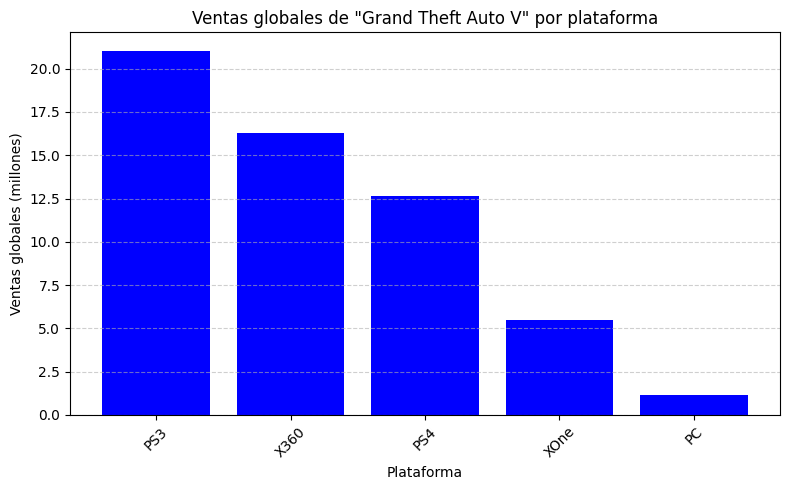

In [77]:
#Bar chart
plt.figure(figsize=(8,5))
plt.bar(df_juego['platform'], df_juego['total_sales'], color='blue')
plt.title(f'Ventas globales de "{juego}" por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Regarding sales of the game GTA V, it has been found that the title is available for PS3, X360, PS4, Xone, and PC. The highest sales were achieved on PS3 and X360.

     platform  total_sales
143       PS4         6.08
264       PS3         4.28
494      X360         2.92
754      XOne         2.18
3381      PSV         0.60
3611      Wii         0.56
4279      3DS         0.46
6097       PC         0.29


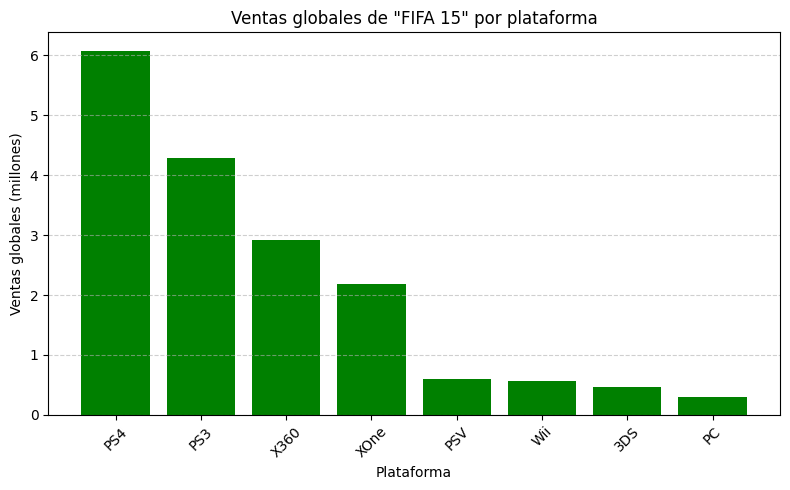

In [78]:
#Single game filter: FIFA 15
juego = 'FIFA 15'
df_juego = df_juegos_multiplataforma[df_juegos_multiplataforma['name']== juego]
print(df_juego[['platform', 'total_sales']].sort_values(by='total_sales', ascending=False))
plt.figure(figsize=(8,5))
plt.bar(df_juego['platform'], df_juego['total_sales'], color='green')
plt.title(f'Ventas globales de "{juego}" por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Regarding sales of the FIFA 15 game, the title is available for PS3, PS4, X360, Xone, PSV, Wii, 3DS, and PC. The highest sales were achieved on PS4 and PS3.

genre
Action          1144.30
Sports           815.45
Shooter          728.13
Misc             567.08
Role-Playing     525.88
Racing           304.18
Platform         281.96
Simulation       222.66
Fighting         193.29
Adventure        145.61
Puzzle            92.60
Strategy          74.80
Name: total_sales, dtype: float64


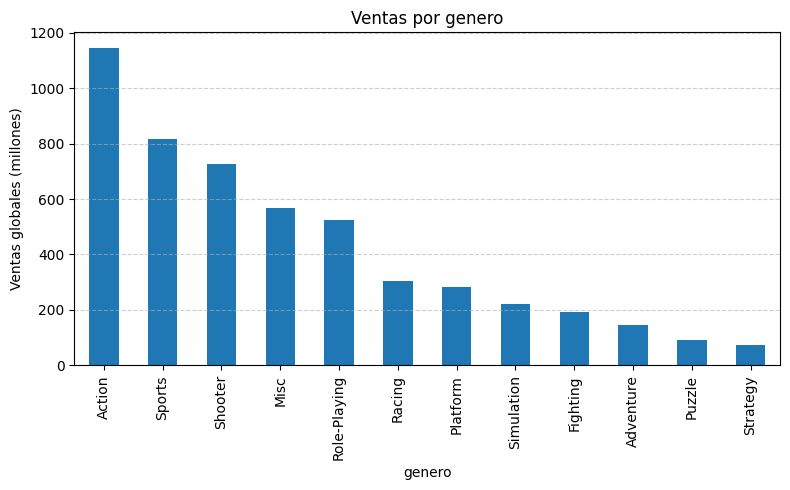

In [79]:
#Sales by gender
ventas_genero = df_datos_2006.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(ventas_genero)
plt.figure(figsize=(8,5))
ventas_genero.plot(kind='bar')
plt.title('Ventas por genero')
plt.xlabel('genero')
plt.ylabel('Ventas globales (millones)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The genres with the highest sales are Action, Sports, and Shooter. I am making this generalization based on the available data. In the period evaluated, the three genres mentioned above are the ones with the highest sales. The lowest sales correspond to Adventure, Puzzle, and Strategy.

## Create a user profile for each region

In [80]:
#user profiles by region
#Sales
ventas_region = df_datos_2006.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum()

#Sales by region
total_na = ventas_region['na_sales'].sum()
total_eu = ventas_region['eu_sales'].sum()
total_jp = ventas_region['jp_sales'].sum()

#Percentage share
ventas_region['na_cuota'] = (ventas_region['na_sales'] / total_na)*100
ventas_region['eu_cuota'] = (ventas_region['eu_sales'] / total_na)*100
ventas_region['jp_cuota'] = (ventas_region['jp_sales'] / total_na)*100

#platforms by region
top_na = ventas_region.sort_values('na_sales', ascending=False).head(5)
top_eu = ventas_region.sort_values('eu_sales', ascending=False).head(5)
top_jp = ventas_region.sort_values('jp_sales', ascending=False).head(5)

print("Top 5 plataformas en NA", top_na[['na_sales','na_cuota']].round(2))
print("-------------------")
print("Top 5 plataformas en EU", top_eu[['eu_sales','eu_cuota']].round(2))
print("-------------------")
print("Top 5 plataformas en JP", top_jp[['jp_sales','jp_cuota']].round(2))

Top 5 plataformas en NA           na_sales  na_cuota
platform                    
X360        595.57     24.35
Wii         496.90     20.32
PS3         393.49     16.09
DS          326.08     13.33
PS2         125.81      5.14
-------------------
Top 5 plataformas en EU           eu_sales  eu_cuota
platform                    
PS3         330.29     13.50
X360        270.33     11.05
Wii         262.21     10.72
DS          143.47      5.87
PS4         141.09      5.77
-------------------
Top 5 plataformas en JP           jp_sales  jp_cuota
platform                    
DS          142.04      5.81
3DS         100.67      4.12
PS3          80.19      3.28
PSP          71.53      2.92
Wii          69.33      2.83


For the X360 platform, it has the largest share in NA with 24.35% of the market share, in the US it ranks second with 11.05%, and in JP it is not among the top 5. The Wii platform ranks second in North America with 20.3%, third in Europe with 10.5%, and fifth in Japan with 2.83%. As for the PS3 platform, it ranks third in North America with a 16.09% market share, first in Europe with 13.5% of sales, and third in Japan with 3.28%. The DS ranks fourth in NA with 13.3% of sales, fourth in EU with 5.87% market share, and first in JP with 5.81%. Finally, the PS2 console ranks fifth in NA and has no market share in EU and JP.


In [81]:
#Main genres
genero_region = df_datos_2006.groupby('genre')[['na_sales','eu_sales','jp_sales']].sum()

#Sales by gender region
top_genero_na = genero_region.sort_values('na_sales', ascending=False).head(5)
top_genero_eu = genero_region.sort_values('eu_sales', ascending=False).head(5)
top_genero_jp = genero_region.sort_values('jp_sales', ascending=False).head(5)

print("Top 5 generos en NA", top_genero_na[['na_sales']].round(2))
print("-------------------")
print("Top 5 generos en EU", top_genero_eu[['eu_sales']].round(2))
print("-------------------")
print("Top 5 generos en JP", top_genero_jp[['jp_sales']].round(2))

Top 5 generos en NA               na_sales
genre                 
Action          546.28
Sports          409.87
Shooter         380.54
Misc            292.76
Role-Playing    200.40
-------------------
Top 5 generos en EU          eu_sales
genre            
Action     358.84
Sports     257.01
Shooter    241.71
Misc       149.02
Racing     115.41
-------------------
Top 5 generos en JP               jp_sales
genre                 
Role-Playing    172.40
Action          103.36
Misc             65.62
Sports           49.58
Platform         35.32


The Action genre has a significant share in all three regions, ranking first in NA with 546 million, first in EU with 358 million, and second in JP with 103 million. The sports genre also has a considerable market share, ranking second in NA with $409 million, second in EU with $257 million, and fourth in JP with $49.5 million. The role-playing genre ranks fifth in NA, has no sales in EU, and ranks first in JP. In all cases, it is striking to see the difference in market size: NA, EU, and JP, respectively.


In [82]:
#Rankings
clasificacion_region = df_datos_2006.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum()

#Sales by gender region
top_clasificacion_na = clasificacion_region.sort_values('na_sales', ascending=False).head(5)
top_clasificacion_eu = clasificacion_region.sort_values('eu_sales', ascending=False).head(5)
top_clasificacion_jp = clasificacion_region.sort_values('jp_sales', ascending=False).head(5)

print("Top 5 generos en NA", top_clasificacion_na[['na_sales']].round(2))
print("-------------------")
print("Top 5 generos en EU", top_clasificacion_eu[['eu_sales']].round(2))
print("-------------------")
print("Top 5 generos en JP", top_clasificacion_jp[['jp_sales']].round(2))

Top 5 generos en NA         na_sales
rating          
E        1105.07
M         579.92
T         436.29
E10+      323.22
EC          1.32
-------------------
Top 5 generos en EU         eu_sales
rating          
E         698.31
M         402.87
T         240.68
E10+      178.52
RP          0.08
-------------------
Top 5 generos en JP         jp_sales
rating          
E         402.39
T          84.60
M          44.45
E10+       36.57
EC          0.00


Regarding the ESRB rating:

The E rating leads the market share in all three regions, as these are games for all audiences.
The M rating ranks second in NA and EU and third in JP.
The T rating ranks third in NA and EU and second in JP.
The E10+ rating ranks fourth in all three regions. There is a correlation between the rating and sales volume.

## Test the following hypotheses:

In [83]:
#Xbox One and PC ratings
xone_calificacion = df_datos_2006[df_datos_2006['platform'] == 'XOne']['user_score']
pc_calificacion = df_datos_2006[df_datos_2006['platform'] == 'PC']['user_score']

#equality of variances

stat_levene, p_levene = levene(xone_calificacion, pc_calificacion)
print("Estadistico Levene:", stat_levene, "p_levene:", p_levene)

alpha = 0.05
if p_levene < alpha: 
    print("The variances are different.")
    equal_var = False
else:
    print("The variances are equal.")
    equal_var = True

#Test t
#Null hypothesis: The average user ratings for the 
#Xbox One and PC platforms are the same. 
#Alternative hypothesis: The average user ratings for the 
#Xbox One and PC platforms are different. 

t_stat, p_value = ttest_ind(xone_calificacion, pc_calificacion, equal_var=equal_var)
print("T-test:", t_stat, "p-valor:",p_value)


#Interpretation: if p_value < alpha, reject null hypothesis; if p_value > alpha, accept null hypothesis.
if p_value < alpha:
    print('We reject the null hypothesis: The average user ratings for the Xbox One and PC platforms are different.')
else:
    print('The null hypothesis cannot be rejected.')  

Estadistico Levene: 2.5193806842825053 p_levene: 0.1127592927863935
The variances are equal.
T-test: -2.1898675771043785 p-valor: 0.028755808537926655
We reject the null hypothesis: The average user ratings for the Xbox One and PC platforms are different.


In [84]:
#User ratings for Action and Sports
accion_calificacion = df_datos_2006[df_datos_2006['genre'] == 'Action']['user_score']
deportes_calificacion = df_datos_2006[df_datos_2006['genre'] == 'Sports']['user_score']

#equality of variances

stat_levene, p_levene = levene(accion_calificacion, deportes_calificacion)
print("Estadistico Levene:", stat_levene, "p_levene:", p_levene)

alpha = 0.05
if p_levene < alpha: 
    print("The variances are different.")
    equal_var = False
else:
    print("The variances are equal.")
    equal_var = True

#t test

stat, p_value = ttest_ind(accion_calificacion, deportes_calificacion, equal_var=equal_var)
print("T-test:", t_stat, "p-valor:",p_value)

#Null hypothesis: The average user ratings for the genres of 
#Action and Sports are different.

#Alternative hypothesis: Users' average ratings for the 
#Action and Sports genres are different. 


#Interpretation: if p_value < alpha, reject null hypothesis; if p_value > alpha, accept null hypothesis.
print(p_value)
if p_value < alpha:
    print('We reject the null hypothesis: The average ratings of users for the Action and Sports genres are different.')
else:
    print('The null hypothesis cannot be rejected.') 

Estadistico Levene: 12.798943174014406 p_levene: 0.00035120319792593564
The variances are different.
T-test: -2.1898675771043785 p-valor: 3.002985974377165e-08
3.002985974377165e-08
We reject the null hypothesis: The average ratings of users for the Action and Sports genres are different.


## Conclusions

1) New platforms appear every five years (approximately). There is no specific pattern to determine a central value for platforms that disappear. In the case of NES, it had sales from 1983 to 1994; in the case of SNES, it had sales from 1980 to 1998; and N64 had sales from 1997 to 2007.
2) Analyzing total sales by platform for the period 2006-2016, we find that the top five platforms with the highest sales are X360, PS3, Wii, DS, and PS4. Compared to the overall total, the same platforms continue to appear as leaders, with the exception of PS, which saw a decline in sales after 2000, probably because it began to be replaced by more modern consoles. The period 2007-2011 accounts for a considerable part of the sales of the entire series, with data growing but then returning to values similar to those prior to 2007.
3) On average, sales range between 0.03 and 1.3. There is a significant concentration of values between 0.3 and 0.7 (50% of values), with 25% of values above 0.7 and below 1.3. Calculated in this way, sales are led by GB, PS4, X360, PS3, and Wii.
4) The genres with the highest sales are Action, Sports, and Shooter. I am making this generalization based on the available data. In the period evaluated, the three genres mentioned above are the ones with the highest sales. The lowest sales correspond to Adventure, Puzzle, and Strategy.
5) For the X360 platform, it has the largest share in NA with 24.35% of the market share, in the EU it ranks second with 11.05%, and in JP it is not among the top 5. The Wii platform ranks second in NA with 20.3%, third in the EU with 10.5%, and fifth in JP with 2.83%. As for the PS3 platform, it ranks third in North America with a 16.09% market share, first in Europe with 13.5% of sales, and third in Japan with 3.28%. The DS ranks fourth in NA with 13.3% of sales, fourth in EU with 5.87% market share, and first in JP with 5.81%. Finally, the PS2 console ranks fifth in NA and has no market share in EU and JP.
6)The Action genre has a significant share in all three regions, ranking first in NA with 546 million, first in EU with 358 million, and second in JP with 103 million. The sports genre also has a considerable market share, ranking second in NA with $409 million, second in EU with $257 million, and fourth in JP with $49.5 million. The role-playing genre ranks fifth in NA, has no sales in EU, and ranks first in JP. In all cases, it is striking to see the difference in market size: NA, EU, and JP, respectively.